## Sparks Foundation 
## Name: Diksha Jha
## Task 04 : Exploratory Data Analysis - Terrorism (Level - Intermediate) 

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Reading CSV File

In [5]:
terrorism_df=pd.read_csv("D:\globalterrorismdb_0718dist.csv")
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Size of Array

In [8]:
terrorism_df.shape

(181691, 135)

### Total Number of Missing Values

In [9]:
terrorism_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Checking for Datatypes

In [10]:
terrorism_df.dtypes

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

### Attribute name

In [11]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Renaming the Column Names

In [12]:
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','target1':'Target',
                             'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType',
                             'nkill':'Kills','nwound':'Wounded','summary':'Summary',
                             'natlty1_txt':'Nationality','gname':'Group','targtype1_txt':'TargetType',
                             'weaptype1_txt':'WeaponType','motive':'Motive','city':'City','latitude':'Latitude',
                             'longitude':'Longitude'},inplace=True)

In [13]:
terrorism_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
global_terrorism=terrorism_df[['Year','Month','Day','Country','Target','State','Region',
                               'City','Latitude','Longitude','AttackType','Kills',
                               'Wounded','Summary','Group','TargetType',
                               'WeaponType','Motive']]

In [15]:
global_terrorism.head()

,Year,Month,Day,Country,Target,State,Region,City,Latitude,Longitude,AttackType,Kills,Wounded,Summary,Group,TargetType,WeaponType,Motive
0,1970,7,2,Dominican Republic,Julio Guzman,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,"Nadine Chaval, daughter",Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Employee,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,U.S. Embassy,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,U.S. Consulate,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### Total Number of Missing Values

In [16]:
global_terrorism.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Target           636
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Kills          10313
Wounded        16311
Summary        66129
Group              0
TargetType         0
WeaponType         0
Motive        131130
dtype: int64

### Visualization

<AxesSubplot:>

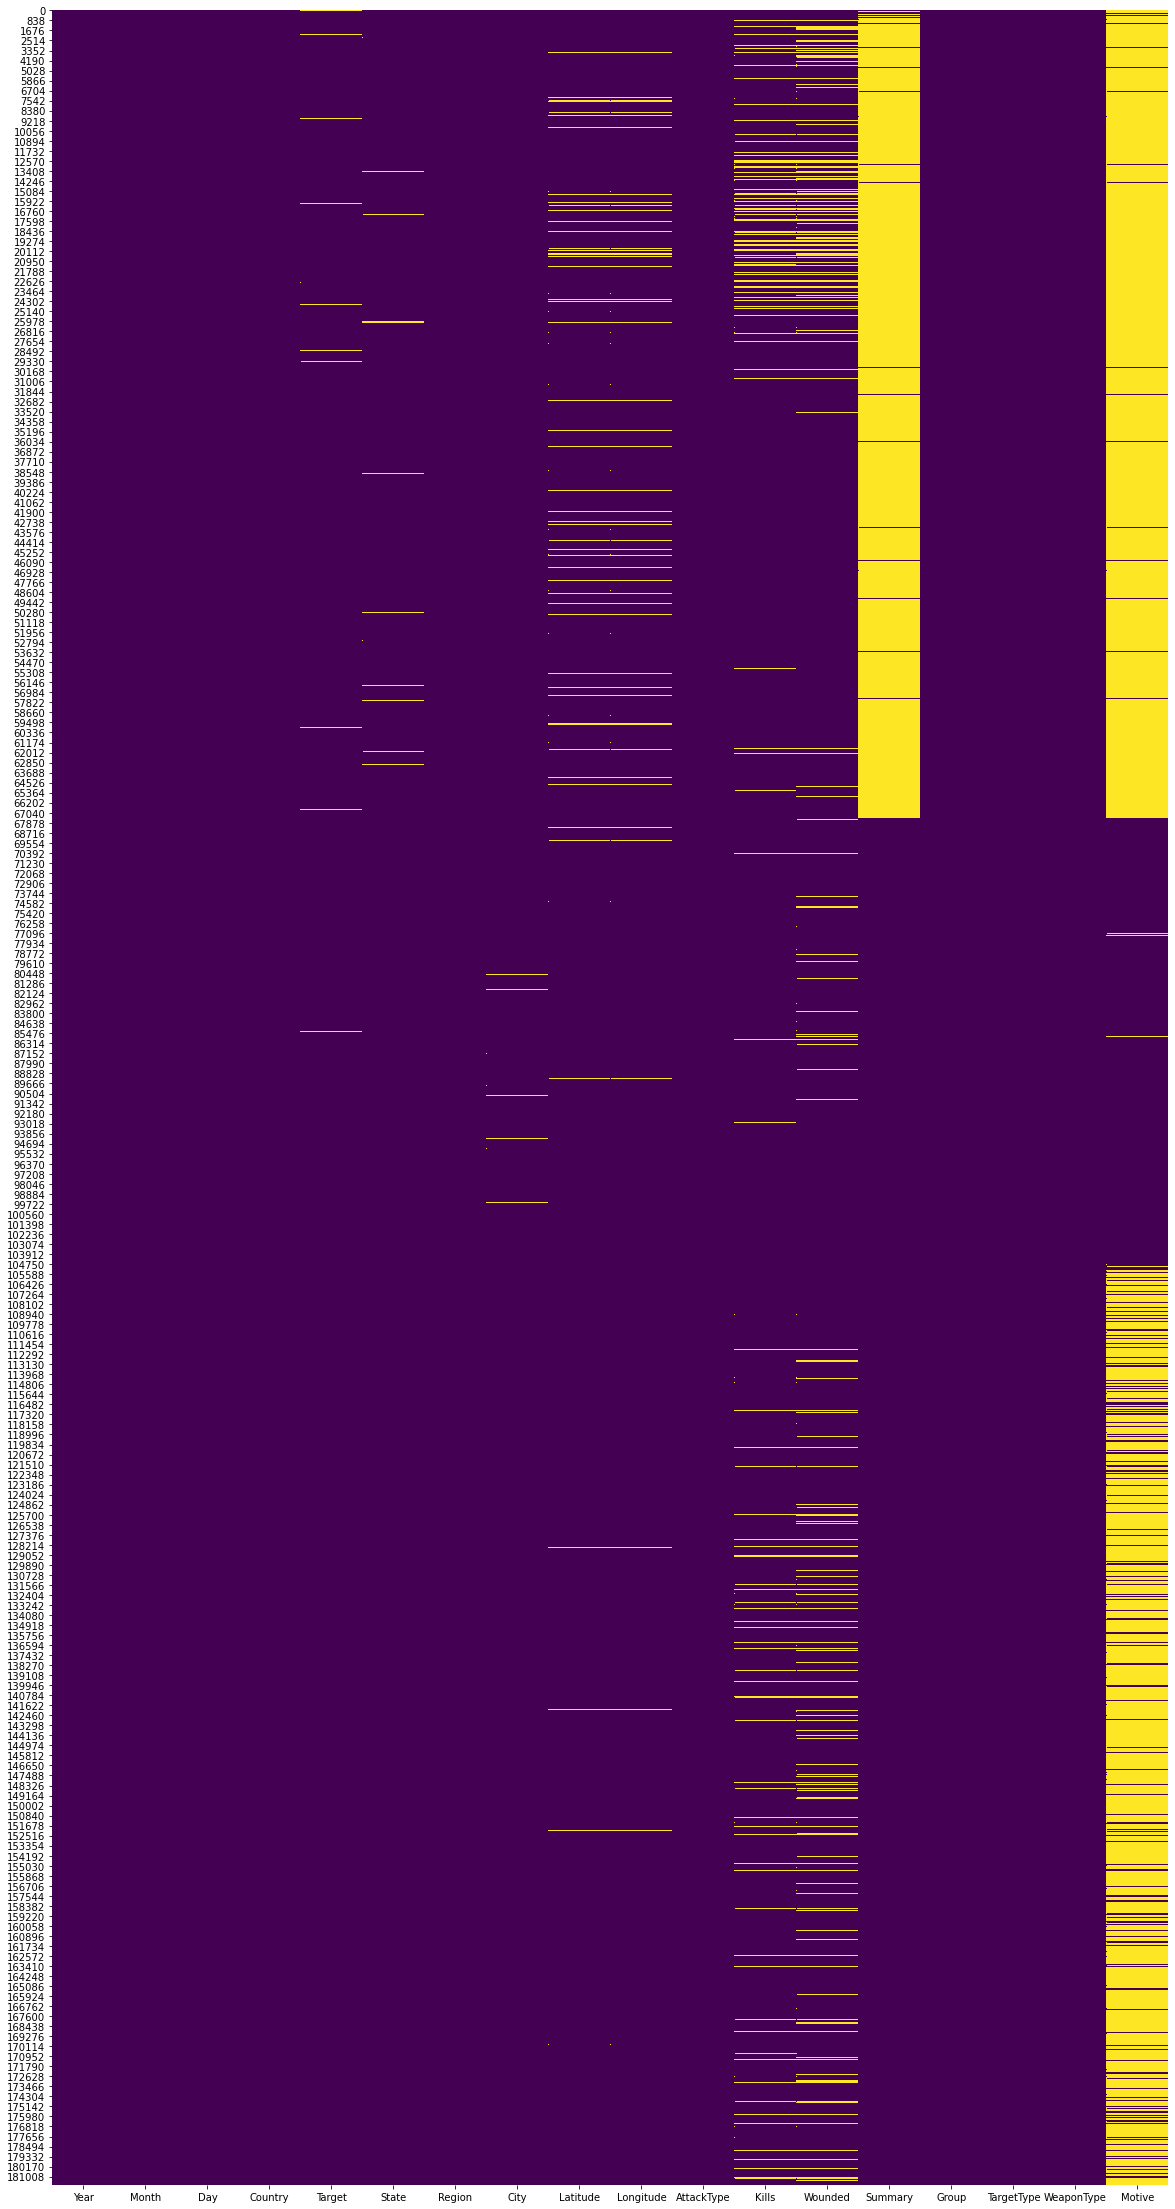

In [17]:
plt.figure(figsize=(20,40))
sns.heatmap(global_terrorism.isnull(),cbar=False,cmap='viridis')

### Descriptive Statistics of Data

In [20]:
global_terrorism.describe()

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Compute Pairwise Correlation of Columns

In [19]:
global_terrorism.corr()

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Kills,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


### Compute the Covariance Matrix

In [20]:
global_terrorism.cov()

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
Year,175.812496,0.006242,2.133346,40.951530,1.059590e+04,2.292652,7.019333
Month,0.006242,11.480600,0.164158,-1.005279,-2.692110e+03,0.135442,0.357870
Day,2.133346,0.164158,77.687385,0.559877,-4.120870e+03,-0.375477,-0.401569
Latitude,40.951530,-1.005279,0.559877,344.816764,5.564253e+03,-3.822593,10.634340
Longitude,10595.897714,-2692.109846,-4120.870170,5564.252921,4.193443e+10,-1358.855169,1740.424297
Kills,2.292652,0.135442,-0.375477,-3.822593,-1.358855e+03,133.304125,188.711482
Wounded,7.019333,0.357870,-0.401569,10.634340,1.740424e+03,188.711482,1292.358771


### Printing the Stats from above Data

In [21]:
print('Country with the most Attacks:',global_terrorism['Country'].value_counts().idxmax())
print('City with the most Attacks:',global_terrorism['City'].value_counts().index[1])
print('Region with the most Attacks:',global_terrorism['Region'].value_counts().idxmax())
print('Year with the most Attacks:',global_terrorism['Year'].value_counts().idxmax())
print('Month with the most Attacks:',global_terrorism['Month'].value_counts().idxmax())
print('Group with the most Attacks:',global_terrorism['Group'].value_counts().index[1])
print('Most Attack Types:',global_terrorism['AttackType'].value_counts().idxmax())

Country with the most Attacks: Iraq
City with the most Attacks: Baghdad
Region with the most Attacks: Middle East & North Africa
Year with the most Attacks: 2014
Month with the most Attacks: 5
Group with the most Attacks: Taliban
Most Attack Types: Bombing/Explosion


### Visualization for Terrorist attack by Region for Every  Year

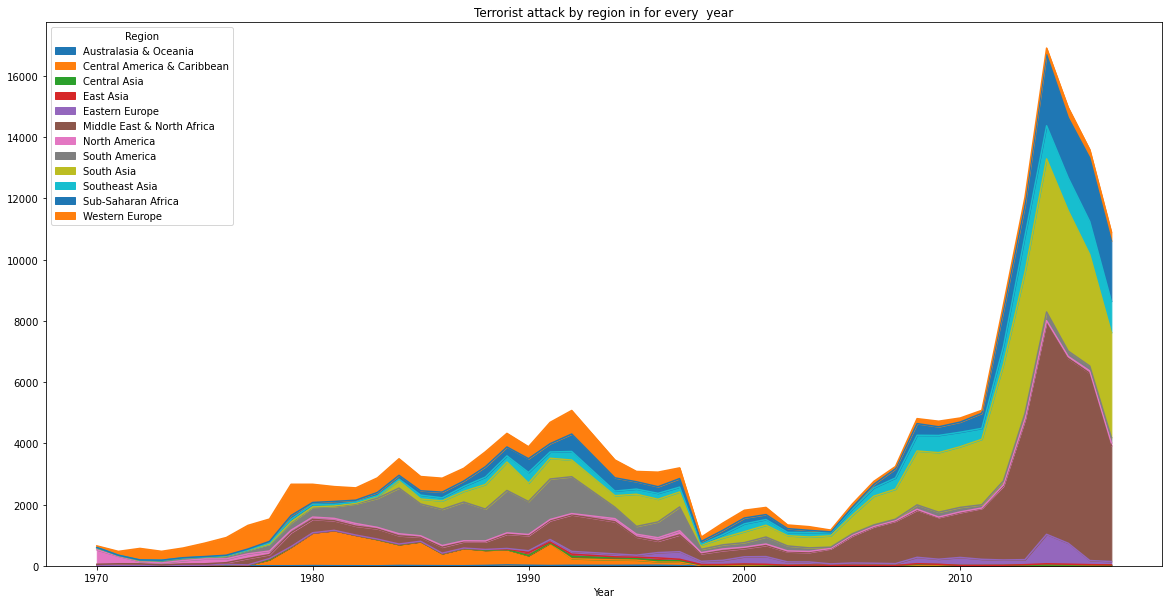

In [21]:
pd.crosstab(global_terrorism.Year,global_terrorism.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist attack by region in for every  year')
plt.show()

### Visualization for No. of Terrorist activities each Year

Text(0.5, 1.0, 'No. of Terrorist activities each Year')

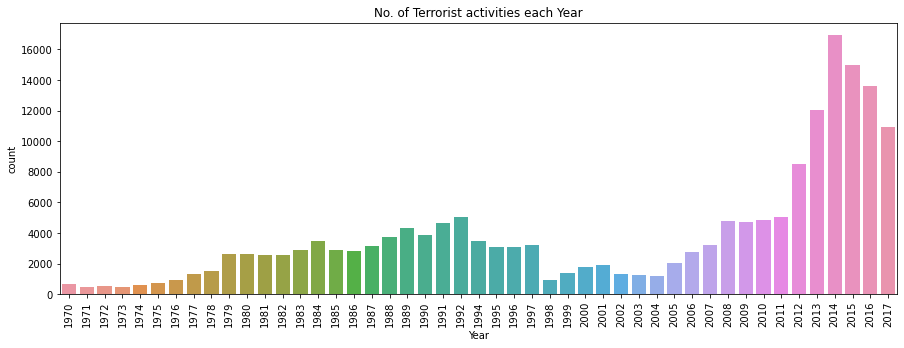

In [23]:
plt.subplots(figsize=(15,5))
sns.countplot('Year',data=global_terrorism)
plt.xticks(rotation=90)
plt.title('No. of Terrorist activities each Year')

In [24]:
global_terrorism['Wounded'] = global_terrorism['Wounded'].fillna(0).astype(int)
global_terrorism['Kills'] = global_terrorism['Kills'].fillna(0).astype(int)
global_terrorism['Casualties'] = global_terrorism['Kills']+global_terrorism['Wounded']

### Number of Occurrences of each Unique Value in the Column 'Country'

In [25]:
global_terrorism.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

### Visualization of Top Affected Countries

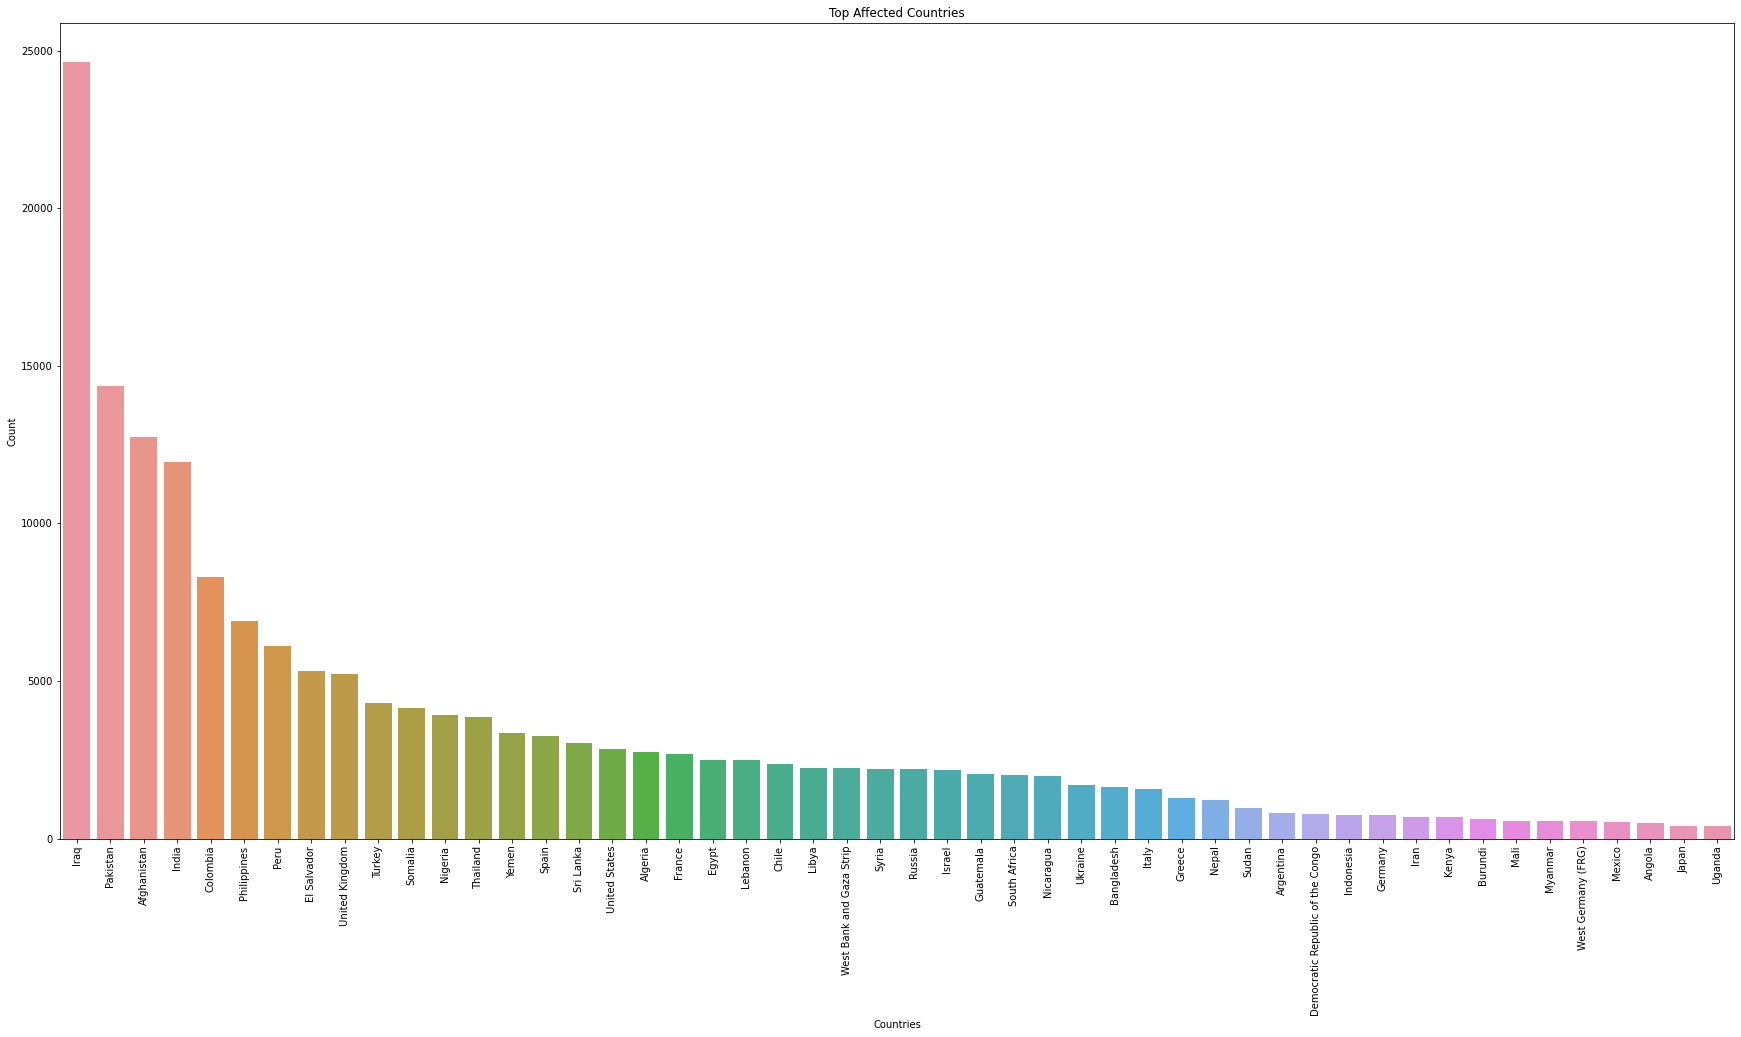

In [26]:
plt.subplots(figsize=(30,15))
sns.barplot(global_terrorism['Country'].value_counts()[:50].index,global_terrorism['Country'].value_counts()[:50])
plt.xticks(rotation=90)
plt.title('Top Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

### Visualization of Method of Attack

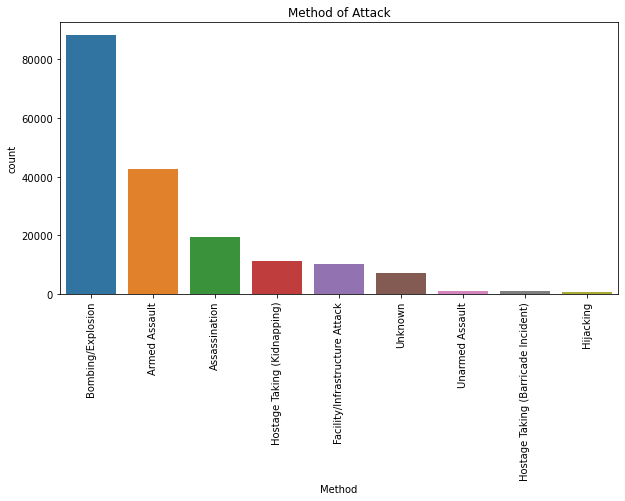

In [27]:
plt.subplots(figsize=(10,5))
sns.countplot(global_terrorism['AttackType'], data = global_terrorism,
            order = global_terrorism['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Method of Attack')
plt.xlabel('Method')
plt.show()

### Visualization of Terrorist Attacks per Country

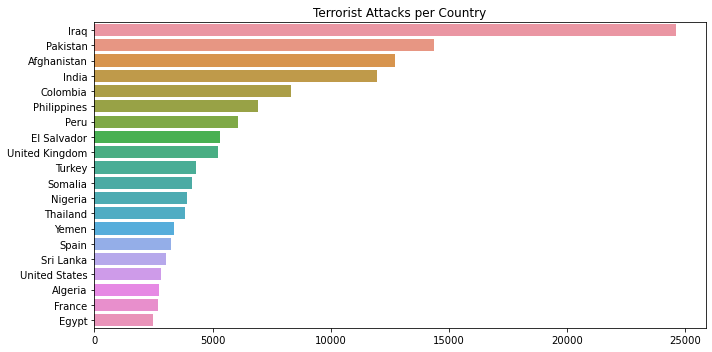

In [28]:
fig,axes = plt.subplots(figsize=(10,5))
sns.barplot(global_terrorism['Country'].value_counts()[:20].values,
            y = global_terrorism['Country'].value_counts()[:20].index)
plt.title('Terrorist Attacks per Country')
fig.tight_layout()
plt.show()

### Visualization of Terrorist Attacks per Region

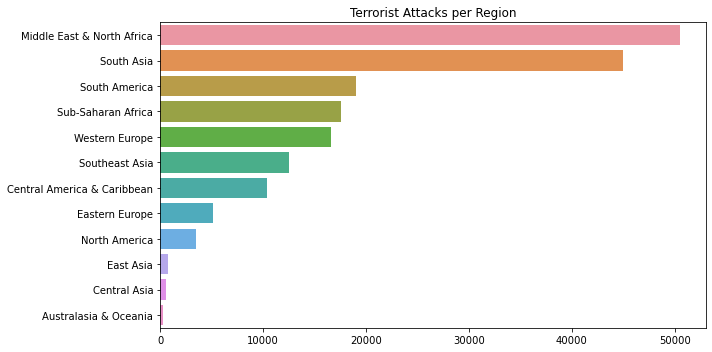

In [29]:
fig,axes = plt.subplots(figsize=(10,5))
sns.barplot(global_terrorism['Region'].value_counts()[:20].values,
            y = global_terrorism['Region'].value_counts()[:20].index)
plt.title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

### Visualization of Terrorist Attacks per Region

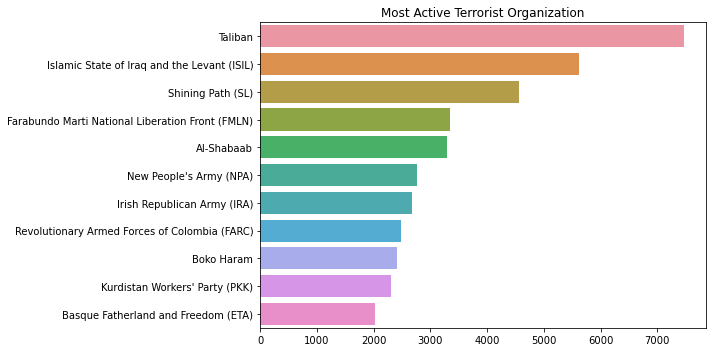

In [30]:
fig,axes = plt.subplots(figsize=(10,5))
sns.barplot(global_terrorism['Group'].value_counts()[1:12].values,
            y = global_terrorism['Group'].value_counts()[1:12].index)
plt.title('Most Active Terrorist Organization')
fig.tight_layout()
plt.show()

### Visualization of Most Affected Areas

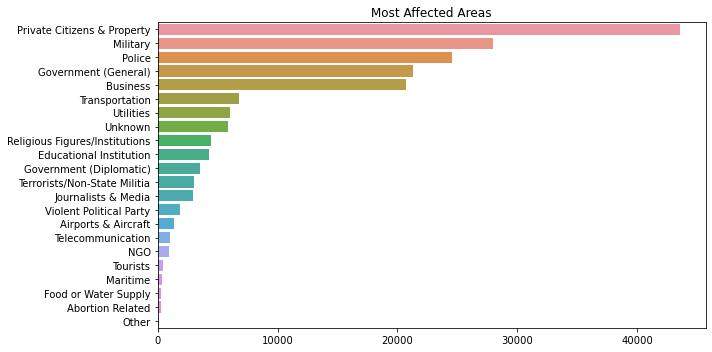

In [26]:
fig,axes = plt.subplots(figsize=(10,5))
sns.barplot(global_terrorism['TargetType'].value_counts().values,
            y = global_terrorism['TargetType'].value_counts().index)
plt.title('Most Affected Areas')
fig.tight_layout()
plt.show()

### Result of Incresed Attack in Percentage

In [32]:
year=global_terrorism.Year.value_counts().to_dict()
rate=((year[2017]-year[1970])/year[2017])*100
print('Attacks Happend in 1970:',year[1970])
print('Attacks Happend in 2017:',year[2017])
print('No. of Attacks form 1970 has increased by:',np.round(rate),'% till 2017')

Attacks Happend in 1970: 651
Attacks Happend in 2017: 10900
No. of Attacks form 1970 has increased by: 94.0 % till 2017


### Visualization of Weapon Type

<AxesSubplot:xlabel='WeaponType', ylabel='count'>

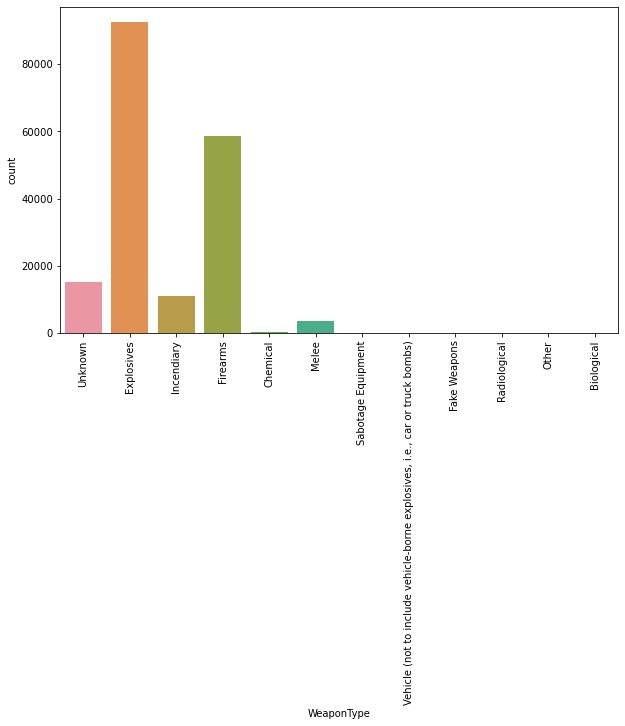

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='WeaponType',data=global_terrorism)

### Visualization of Attack type and Targeted Areas

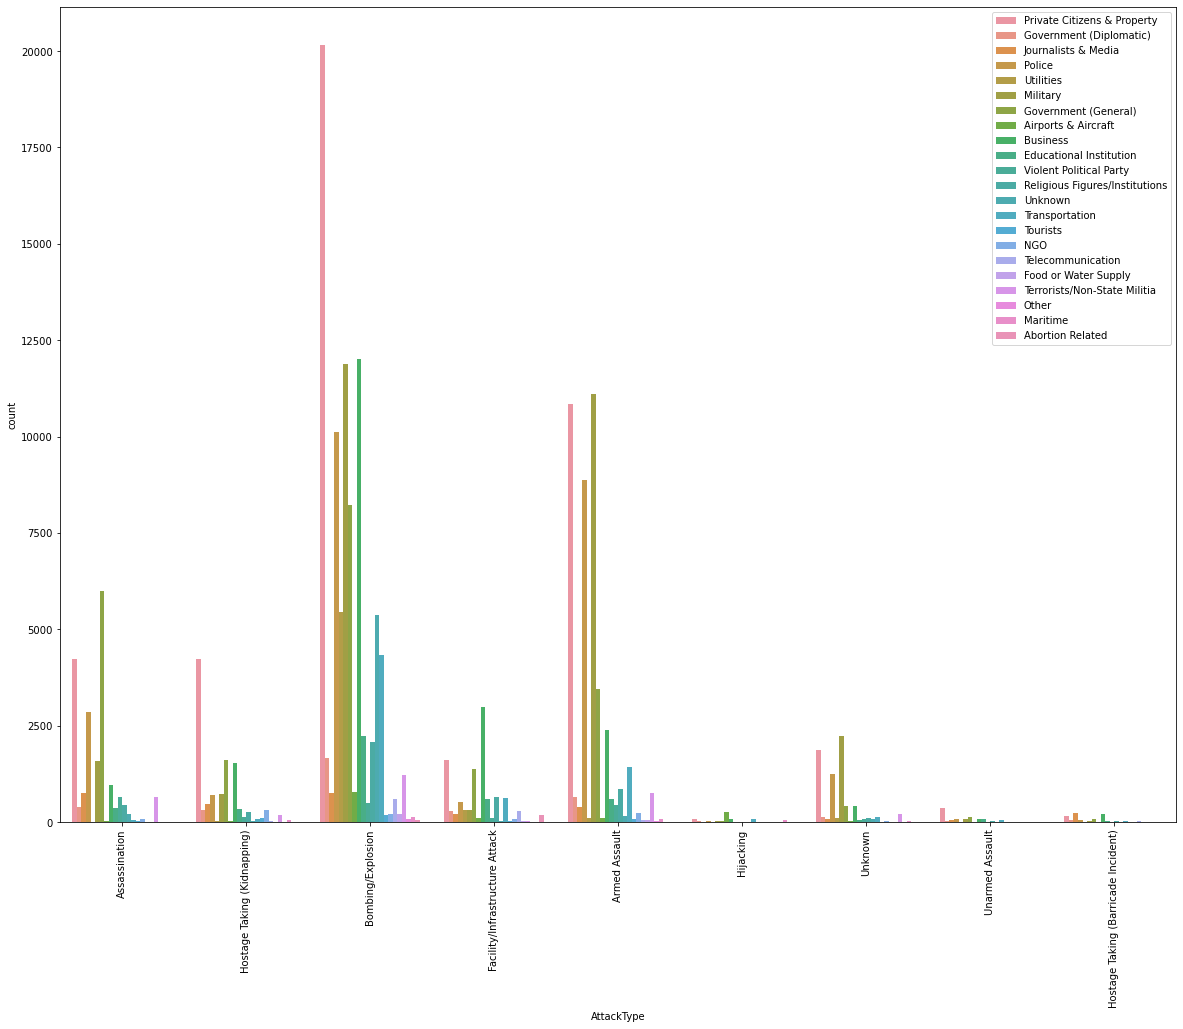

In [34]:
plt.figure(figsize=(20,15))
sns.countplot(x='AttackType',hue='TargetType',data=global_terrorism)
plt.xticks(rotation=90)
plt.legend(loc='upper right')